# KNN-鳶尾花分類

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
%matplotlib inline

# 1.import分析用data

In [7]:
from sklearn.datasets import load_iris

In [8]:
#將iris data傳進data
data1=load_iris()

In [15]:
data1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
#.data:特徵data  #.feature_names特徵名
data_set=pd.DataFrame(data=data1.data,columns=data1.feature_names)
#.target答案data #.target_names答案名
data_set['answer']=data1.target
data_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


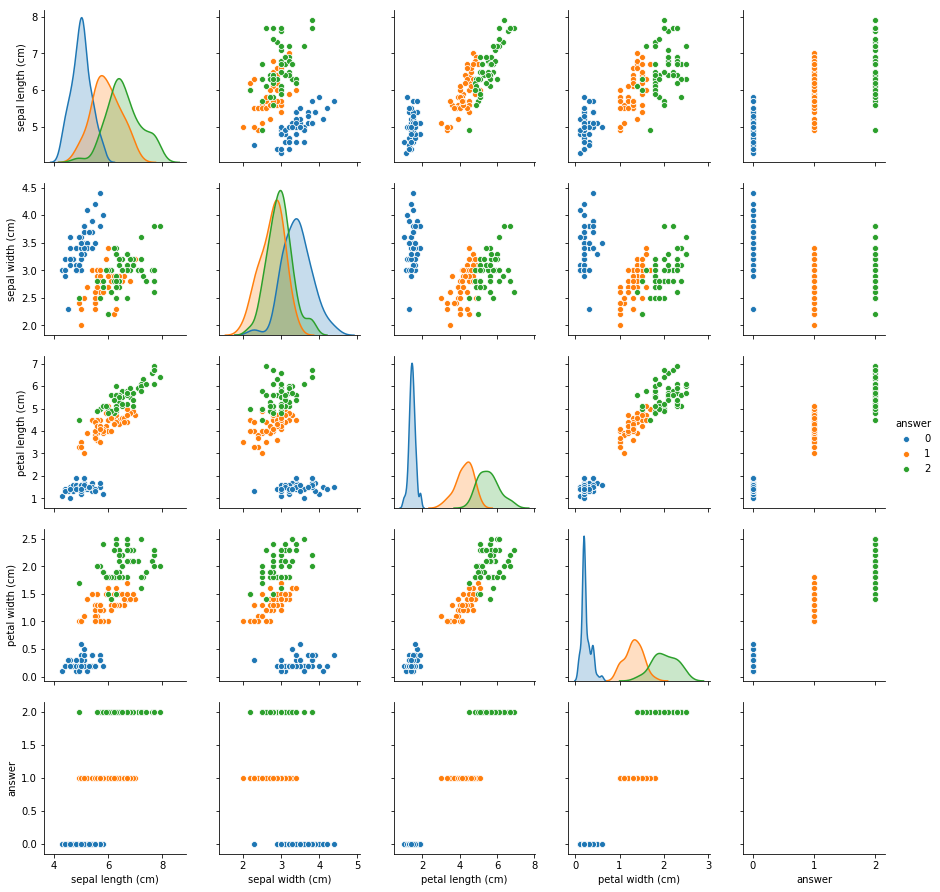

In [25]:
import seaborn as sns
sns.pairplot(data_set,hue='answer')

# 2.Data preprocessing

In [57]:
std_data=StandardScaler().fit_transform(data_set.iloc[:,:-1])

In [60]:
std_dataframe=pd.DataFrame(data=std_data,columns=data_set.columns[:-1])
std_dataframe['answer']=data_set['answer']
std_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


# 2.分割train\test data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#train_test_split(X,Y,test_size=?,random_state=?)
#random_state:隨機分割所代表的種子名
X=std_dataframe.iloc[:,:-1]
Y=std_dataframe['answer']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state=0)

# 3.fitting data

(1)引進模組

In [32]:
from sklearn.neighbors import KNeighborsClassifier

(2)設定參數並建立自己的模型

In [33]:
model_jmda=KNeighborsClassifier(n_neighbors=3) #選取鄰近3個

(3)fitting training數據

In [64]:
model_jmda.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

(4)看fitting的結果

In [66]:
#看fitting data分數
train_score=model_jmda.score(train_x,train_y)
test_score=model_jmda.score(test_x,test_y)
print('train_score:[{}]   test_score:[{}]'.format(train_score,test_score))

train_score:[0.9732142857142857]   test_score:[0.9736842105263158]


In [82]:
dict1=pd.Series({0:'setosa',1:'versicolor',2:'virginica'})
#隨機選一組數據
predict_sample=data_set.iloc[np.random.randint(len(data_set)-1),:-1]
#predict觀察結果
predict_answer=model_jmda.predict([predict_sample])
print('features:\n{}\n\npredict:  {}'.format(predict_sample,dict1[predict_answer].values[0]))

features:
sepal length (cm)    6.8
sepal width (cm)     2.8
petal length (cm)    4.8
petal width (cm)     1.4
Name: 76, dtype: float64

predict:  virginica


# 4.調整參數

In [83]:
train_scores=[]
test_scores=[]
for k in range(1,20):
    model_jmda=KNeighborsClassifier(n_neighbors=k)
    model_jmda.fit(train_x,train_y)
    train_scores.append(model_jmda.score(train_x,train_y))
    test_scores.append(model_jmda.score(test_x,test_y))

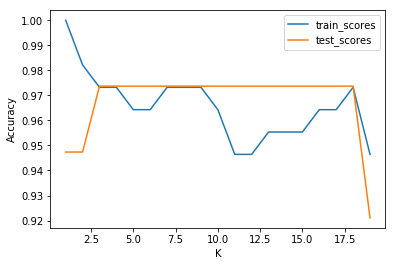

In [84]:
plt.figure()
plt.plot(range(1,20),train_scores,label='train_scores')
plt.plot(range(1,20),test_scores,label='test_scores')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()